In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.model_selection import cross_validate

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

## Read csv

In [2]:
at = pd.read_csv(r"E:\Data science\Python\Datasets\Attrition.csv")
at.shape

(1470, 35)

In [3]:
at.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
at.shape

(1470, 35)

In [5]:
at.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Data Preprocessing

In [6]:
# No missing values
at.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
at.isnull().sum().sum()

0

In [8]:
# Highly imbalanced
at.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

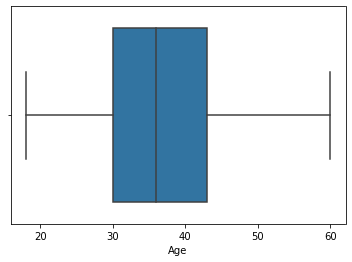

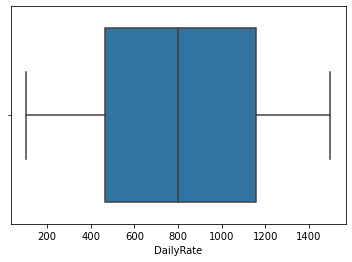

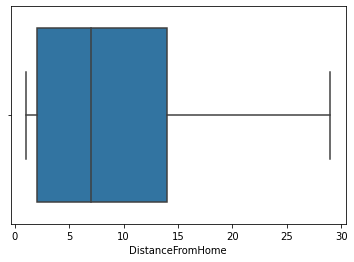

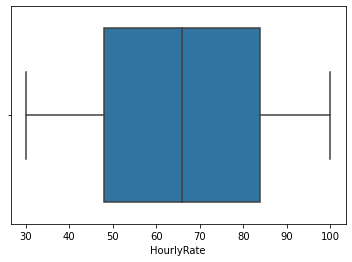

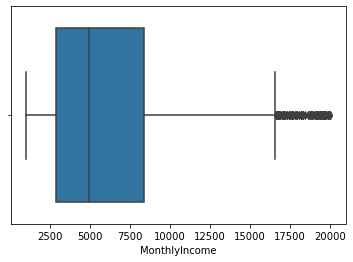

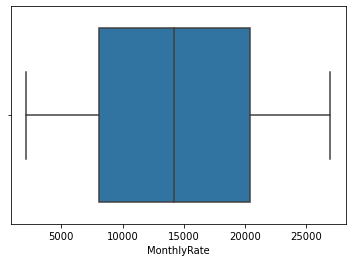

In [9]:
# Checking for Outliers in numeric columns
lst = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate']
for i in lst:
    sns.boxplot(at[i])
    plt.show()

In [10]:
Q1 = np.quantile(at.MonthlyIncome, [0.25])
Q3 = np.quantile(at.MonthlyIncome, [0.75])
IQR = Q3 - Q1
at[at.MonthlyIncome>16581].shape

(114, 35)

<AxesSubplot:xlabel='MonthlyIncome'>

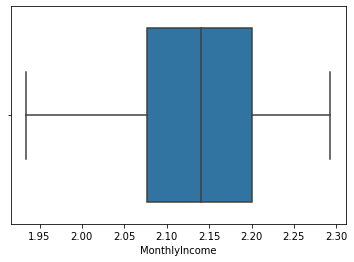

In [11]:
# Monthly income column contains outliers
# Applying log to monthly income
at['MonthlyIncome'] = np.log(at['MonthlyIncome'])
sns.boxplot(np.log(at['MonthlyIncome']))

### Dropping Zero Variance Predictors

In [12]:
at.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [13]:
at.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [14]:
at.StandardHours.value_counts()

80    1470
Name: StandardHours, dtype: int64

In [15]:
at.drop(columns = ['EmployeeCount','EmployeeNumber','Over18','StandardHours'] , inplace = True)

## Feature Engineering

**1. Binning**

In [16]:
at['Age_bins'] = pd.qcut(at.Age, [0,0.25,0.50,0.75,1.0], labels= ['Young','Adults','Middle_Aged','Old']).astype(object)
at['Distance_bins'] = pd.qcut(at.DistanceFromHome, [0,0.25,0.50,0.75,1.0], labels= ['VeryClose','Medium','Far','VeryFar']).astype(object)
at['Experiance_bins'] = pd.cut(at.TotalWorkingYears, [0,1,5,10,15,40], labels = ['Freshers','Associate','SnAssociate','Lead','SnLead']).astype(object)
at['Promotion_bins'] = pd.qcut(at.YearsSinceLastPromotion, [0,0.50,0.75,1.0], labels = ['0_1','2_3','3_15']).astype(object)

**2. Feature Encoding**

In [17]:
at_x = at.loc[:,at.columns!='Attrition']
at_y = at.loc[:,'Attrition']

In [18]:
numcols = at_x.select_dtypes(include = "int64").columns
factcols = at_x.select_dtypes(include = "object").columns

In [19]:
# Label Encoding

# le = LabelEncoder()
# at_x[factcols] = at_x[factcols].apply(le.fit_transform)

In [20]:
# One hot encoding

at_x = pd.get_dummies(at_x , columns = at_x.select_dtypes(include = 'object').columns)
at_x.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Age_bins_Adults,Age_bins_Middle_Aged,Age_bins_Old,Age_bins_Young,Distance_bins_Far,Distance_bins_Medium,Distance_bins_VeryClose,Distance_bins_VeryFar,Experiance_bins_Associate,Experiance_bins_Freshers,Experiance_bins_Lead,Experiance_bins_SnAssociate,Experiance_bins_SnLead,Promotion_bins_0_1,Promotion_bins_2_3,Promotion_bins_3_15
0,41,1102,1,2,2,94,3,2,4,8.698347,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,49,279,8,1,3,61,2,2,2,8.542861,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,7.644919,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
3,33,1392,3,4,4,56,3,1,3,7.975565,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,27,591,2,1,1,40,3,1,2,8.151333,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0


In [21]:
at1 = at_x.copy()

## Feature Selection

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

In [23]:
# feat_IG = pd.DataFrame({'Features':at_x.columns,'Information_Gain':mutual_info_classif(at_x,at_y,random_state = 100)}).sort_values('Information_Gain',ascending = False)
# list(feat_IG.iloc[0:25,:]['Features'])

In [24]:
# SelectKBest

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func = chi2 , k='all')
fited = test.fit(at_x,at_y)
fi1 = pd.DataFrame({'Features':at_x.columns, 'Feature_Imp':fited.scores_}).sort_values('Feature_Imp',ascending = False).set_index('Features')
fi1

,Feature_Imp
Features,
MonthlyRate,1196.633553
DailyRate,956.580494
TotalWorkingYears,230.721618
YearsAtCompany,142.100054
YearsInCurrentRole,117.522596
YearsWithCurrManager,110.671534
Age,84.155277
Experiance_bins_Freshers,66.261266
OverTime_Yes,63.845067


In [25]:
# Recurring Feature Elimination

from sklearn.feature_selection import RFE

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

rfe = RFE(ada,  20)
rfe.fit(at_x, at_y)

feat = pd.DataFrame({'Features':list(at_x.columns),'Feature_relevance_ranking':list(rfe.ranking_)}).sort_values('Feature_relevance_ranking',ascending = False).set_index('Features')
feat

,Feature_relevance_ranking
Features,
EducationField_Other,48
EducationField_Medical,47
Promotion_bins_3_15,46
EducationField_Marketing,45
Promotion_bins_2_3,44
EducationField_Life Sciences,43
Promotion_bins_0_1,42
EducationField_Human Resources,41
Experiance_bins_SnLead,40


In [26]:
# Final: SelectKBest & RFE
# Selecting common irrelevant features. Criteria:- In selectKBest, score< 2 & in RFE, Rank>2
set( fi1[fi1.Feature_Imp<2].index & feat[feat.Feature_relevance_ranking>1 ].index )

{'Age_bins_Adults',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Distance_bins_Far',
 'Distance_bins_Medium',
 'Education',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Other',
 'Experiance_bins_Lead',
 'Experiance_bins_SnAssociate',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Human Resources',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'PercentSalaryHike',
 'PerformanceRating',
 'Promotion_bins_0_1',
 'Promotion_bins_2_3',
 'RelationshipSatisfaction'}

In [27]:
# Only SelectKBest and RFE
final_feat = list(at_x.columns)

for name in ['Age_bins_Adults','BusinessTravel_Travel_Rarely','Department_Human Resources','Distance_bins_Far',
             'Distance_bins_Medium','Education','EducationField_Human Resources','EducationField_Life Sciences',
             'EducationField_Other','Experiance_bins_Lead','Experiance_bins_SnAssociate','Gender_Female','Gender_Male',
             'JobRole_Human Resources','JobRole_Research Scientist','JobRole_Sales Executive','PercentSalaryHike',
             'PerformanceRating','Promotion_bins_0_1','Promotion_bins_2_3','RelationshipSatisfaction']:
    final_feat.remove(name)
print(final_feat)

['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'Department_Research & Development', 'Department_Sales', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Technical Degree', 'JobRole_Healthcare Representative', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Sales Representative', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes', 'Age_bins_Middle_Aged', 'Age_bins_Old', 'Age_bins_Young', 'Distance_bins_VeryClose', 'Distance_bins_VeryFar', 'Experiance_bins_Associate',

### Train Test Split

In [28]:
at['Attrition'].replace({'No':0,'Yes':1},inplace = True)

In [29]:
at_x = at_x[final_feat]

In [30]:
at_train_x , at_test_x, at_train_y , at_test_y = train_test_split(at_x , at_y , test_size = 0.3 , stratify = at_y, random_state = 100)

### Oversampling

In [31]:
from collections import Counter
Counter(at_y)

Counter({1: 237, 0: 1233})

In [32]:
from imblearn.over_sampling import RandomOverSampler

os=RandomOverSampler(0.40) # 0.75* count of class 0 = new count of class 1
X_train_ns,y_train_ns = os.fit_sample(at_train_x,at_train_y)
print("The number of classes before fit {}".format(Counter(at_train_y)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 863, 1: 166})
The number of classes after fit Counter({0: 863, 1: 345})


### SmoteTomek

In [33]:
from imblearn.combine import SMOTETomek

os=SMOTETomek(0.40)
X_train_ns,y_train_ns=os.fit_sample(at_train_x,at_train_y)
print("The number of classes before fit {}".format(Counter(at_train_y)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 863, 1: 166})
The number of classes after fit Counter({0: 783, 1: 265})


# Model Building

In [34]:
acc = []; prec = []; recall = [] ; f1 = []
models = ['Logistic','DecisionTree','RandomForest','AdaBoost','Xgboost','NaiveBayes','SVM','VotingClassifier']

In [35]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(at_train_x, at_train_y)
valid_pred = logmodel.predict(at_test_x) ; train_pred = logmodel.predict(at_train_x)

acc.append(round(accuracy_score(valid_pred,at_test_y),2)) ; train_score = accuracy_score(train_pred,at_train_y)
f1.append(round(f1_score(valid_pred,at_test_y),2))
prec.append(round(precision_score(valid_pred,at_test_y),2))
recall.append(round(recall_score(valid_pred,at_test_y),2))

print("*******For test data********")
print(confusion_matrix(valid_pred,at_test_y))
print(classification_report(valid_pred,at_test_y))
print("******For train data*******")
print(classification_report(train_pred,at_train_y))

*******For test data********
[[369  67]
 [  1   4]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       436
           1       0.06      0.80      0.11         5

    accuracy                           0.85       441
   macro avg       0.53      0.82      0.51       441
weighted avg       0.99      0.85      0.91       441

******For train data*******
              precision    recall  f1-score   support

           0       0.99      0.85      0.91      1008
           1       0.08      0.62      0.14        21

    accuracy                           0.84      1029
   macro avg       0.53      0.73      0.53      1029
weighted avg       0.97      0.84      0.90      1029



In [36]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 12)
dtree.fit(at_train_x, at_train_y)
valid_pred = dtree.predict(at_test_x) ; train_pred = dtree.predict(at_train_x)
train_score = accuracy_score(train_pred,at_train_y)

acc.append(round(accuracy_score(valid_pred,at_test_y),2))
f1.append(round(f1_score(valid_pred,at_test_y),2))
prec.append(round(precision_score(valid_pred,at_test_y),2))
recall.append(round(recall_score(valid_pred,at_test_y),2))

print("*******For test data********")
print(confusion_matrix(valid_pred,at_test_y))
print(classification_report(valid_pred,at_test_y))
print("******For train data*******")
print(classification_report(train_pred,at_train_y))

*******For test data********
[[326  42]
 [ 44  29]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       368
           1       0.41      0.40      0.40        73

    accuracy                           0.80       441
   macro avg       0.64      0.64      0.64       441
weighted avg       0.80      0.80      0.80       441

******For train data*******
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       877
           1       0.92      1.00      0.96       152

    accuracy                           0.99      1029
   macro avg       0.96      0.99      0.97      1029
weighted avg       0.99      0.99      0.99      1029



In [37]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(at_train_x, at_train_y)
valid_pred = rf.predict(at_test_x) ; train_pred = rf.predict(at_train_x)
train_score = accuracy_score(train_pred,at_train_y)

acc.append(round(accuracy_score(valid_pred,at_test_y),2))
f1.append(round(f1_score(valid_pred,at_test_y),2))
prec.append(round(precision_score(valid_pred,at_test_y),2))
recall.append(round(recall_score(valid_pred,at_test_y),2))

print("*******For test data********")
print(confusion_matrix(valid_pred,at_test_y))
print(classification_report(valid_pred,at_test_y))
print("******For train data*******")
print(classification_report(train_pred,at_train_y))

*******For test data********
[[366  59]
 [  4  12]]
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       425
           1       0.17      0.75      0.28        16

    accuracy                           0.86       441
   macro avg       0.58      0.81      0.60       441
weighted avg       0.96      0.86      0.90       441

******For train data*******
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       166

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029



In [38]:
# Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
ad.fit(at_train_x, at_train_y)
valid_pred = ad.predict(at_test_x) ; train_pred = ad.predict(at_train_x)
train_score = accuracy_score(train_pred,at_train_y)

acc.append(round(accuracy_score(valid_pred,at_test_y),2))
f1.append(round(f1_score(valid_pred,at_test_y),2))
prec.append(round(precision_score(valid_pred,at_test_y),2))
recall.append(round(recall_score(valid_pred,at_test_y),2))

print("*******For test data********")
print(confusion_matrix(valid_pred,at_test_y))
print(classification_report(valid_pred,at_test_y))
print("******For train data*******")
print(classification_report(train_pred,at_train_y))

*******For test data********
[[356  34]
 [ 14  37]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       390
           1       0.52      0.73      0.61        51

    accuracy                           0.89       441
   macro avg       0.74      0.82      0.77       441
weighted avg       0.91      0.89      0.90       441

******For train data*******
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       924
           1       0.51      0.80      0.62       105

    accuracy                           0.90      1029
   macro avg       0.74      0.86      0.78      1029
weighted avg       0.93      0.90      0.91      1029



In [39]:
# Adaboost Classifier after SmoteTomek
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
ad.fit(X_train_ns,y_train_ns)
valid_pred = ad.predict(at_test_x) ; train_pred = ad.predict(X_train_ns)
train_score = accuracy_score(train_pred,y_train_ns)

print("*******For test data********")
print(confusion_matrix(valid_pred,at_test_y))
print(classification_report(valid_pred,at_test_y))
print("******For train data*******")
print(classification_report(train_pred,y_train_ns))

*******For test data********
[[346  34]
 [ 24  37]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       380
           1       0.52      0.61      0.56        61

    accuracy                           0.87       441
   macro avg       0.73      0.76      0.74       441
weighted avg       0.88      0.87      0.87       441

******For train data*******
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       821
           1       0.78      0.91      0.84       227

    accuracy                           0.92      1048
   macro avg       0.88      0.92      0.89      1048
weighted avg       0.93      0.92      0.93      1048



**After performing oversampling, f1 score dropped to 0.55 as opposed to f1 score of 0.62 in without oversampling case.**

In [40]:
# Xgboost
from xgboost import XGBClassifier
xgc = XGBClassifier()
xgc.fit(at_train_x, at_train_y)
valid_pred = xgc.predict(at_test_x) ; train_pred = xgc.predict(at_train_x)
train_score = accuracy_score(train_pred,at_train_y)

acc.append(round(accuracy_score(valid_pred,at_test_y),2))
f1.append(round(f1_score(valid_pred,at_test_y),2))
prec.append(round(precision_score(valid_pred,at_test_y),2))
recall.append(round(recall_score(valid_pred,at_test_y),2))

print("*******For test data********")
print(confusion_matrix(valid_pred,at_test_y))
print(classification_report(valid_pred,at_test_y))
print("******For train data*******")
print(classification_report(train_pred,at_train_y))

[13:46:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
*******For test data********
[[359  47]
 [ 11  24]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.93       406
           1       0.34      0.69      0.45        35

    accuracy                           0.87       441
   macro avg       0.65      0.78      0.69       441
weighted avg       0.92      0.87      0.89       441

******For train data*******
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       166

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted av

In [41]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB

naive_bay = MultinomialNB()
naive_bay.fit(at_train_x, at_train_y)
valid_pred = naive_bay.predict(at_test_x) ; train_pred = naive_bay.predict(at_train_x)
train_score = accuracy_score(train_pred,at_train_y)

acc.append(round(accuracy_score(valid_pred,at_test_y),2))
f1.append(round(f1_score(valid_pred,at_test_y),2))
prec.append(round(precision_score(valid_pred,at_test_y),2))
recall.append(round(recall_score(valid_pred,at_test_y),2))

print("*******For test data********")
print(confusion_matrix(valid_pred,at_test_y))
print(classification_report(valid_pred,at_test_y))
print("******For train data*******")
print(classification_report(train_pred,at_train_y))

*******For test data********
[[209  38]
 [161  33]]
              precision    recall  f1-score   support

           0       0.56      0.85      0.68       247
           1       0.46      0.17      0.25       194

    accuracy                           0.55       441
   macro avg       0.51      0.51      0.46       441
weighted avg       0.52      0.55      0.49       441

******For train data*******
              precision    recall  f1-score   support

           0       0.55      0.86      0.67       554
           1       0.52      0.18      0.27       475

    accuracy                           0.55      1029
   macro avg       0.54      0.52      0.47      1029
weighted avg       0.54      0.55      0.49      1029



In [42]:
# SVM

from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(at_train_x, at_train_y)
valid_pred = svc_model.predict(at_test_x) ; train_pred = svc_model.predict(at_train_x)
train_score = accuracy_score(train_pred,at_train_y)

acc.append(round(accuracy_score(valid_pred,at_test_y),2))
f1.append(round(f1_score(valid_pred,at_test_y),2))
prec.append(round(precision_score(valid_pred,at_test_y),2))
recall.append(round(recall_score(valid_pred,at_test_y),2))

print("*******For test data********")
print(confusion_matrix(valid_pred,at_test_y))
print(classification_report(valid_pred,at_test_y))
print("******For train data*******")
print(classification_report(train_pred,at_train_y))

*******For test data********
[[370  71]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       441
           1       0.00      0.00      0.00         0

    accuracy                           0.84       441
   macro avg       0.50      0.42      0.46       441
weighted avg       1.00      0.84      0.91       441

******For train data*******
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1029
           1       0.00      0.00      0.00         0

    accuracy                           0.84      1029
   macro avg       0.50      0.42      0.46      1029
weighted avg       1.00      0.84      0.91      1029



In [43]:
# Voting Classifier

from sklearn.ensemble import VotingClassifier



dtree = DecisionTreeClassifier()
rfc = RandomForestClassifier()
ada = AdaBoostClassifier()
xgc = XGBClassifier()
naive_bay = MultinomialNB()


vc = VotingClassifier(estimators=[("xgc",xgc),("ada",ada)])

vc.fit(at_train_x, at_train_y)
valid_pred = vc.predict(at_test_x) ; train_pred = vc.predict(at_train_x)
train_score = accuracy_score(train_pred,at_train_y)

acc.append(round(accuracy_score(valid_pred,at_test_y),2))
f1.append(round(f1_score(valid_pred,at_test_y),2))
prec.append(round(precision_score(valid_pred,at_test_y),2))
recall.append(round(recall_score(valid_pred,at_test_y),2))

print("*******For test data********")
print(confusion_matrix(valid_pred,at_test_y))
print(classification_report(valid_pred,at_test_y))
print("******For train data*******")
print(classification_report(train_pred,at_train_y))

[13:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
*******For test data********
[[367  49]
 [  3  22]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       416
           1       0.31      0.88      0.46        25

    accuracy                           0.88       441
   macro avg       0.65      0.88      0.70       441
weighted avg       0.95      0.88      0.91       441

******For train data*******
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       945
           1       0.51      1.00      0.67        84

    accuracy                           0.92      1029
   macro avg       0.75      0.96      0.81      1029
weighted av

In [44]:
compare = pd.concat([pd.Series(models),pd.Series(acc),pd.Series(prec),pd.Series(recall),pd.Series(f1)]
                    ,axis=1)
compare.columns = ['Models','Accuracy','Precision','Recall','f1']
compare

,Models,Accuracy,Precision,Recall,f1
0,Logistic,0.85,0.06,0.80,0.11
1,DecisionTree,0.80,0.41,0.40,0.40
2,RandomForest,0.86,0.17,0.75,0.28
3,AdaBoost,0.89,0.52,0.73,0.61
4,Xgboost,0.87,0.34,0.69,0.45
5,NaiveBayes,0.55,0.46,0.17,0.25
6,SVM,0.84,0.00,0.00,0.00
7,VotingClassifier,0.88,0.31,0.88,0.46


## Comparing Baseline Models

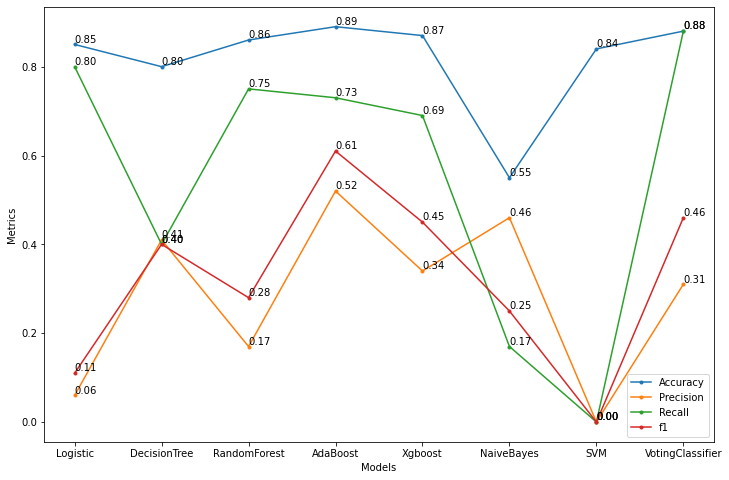

In [45]:
plt.subplots(figsize=(12,8))
plt.plot(compare.Models,compare.Accuracy,marker = '.')
plt.plot(compare.Models,compare.Precision,marker = '.')
plt.plot(compare.Models,compare.Recall,marker = '.')
plt.plot(compare.Models,compare.f1,marker = '.')
plt.legend(('Accuracy','Precision','Recall','f1'))

for x,y in zip(compare.Models,compare.Accuracy):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points",
                xytext=(0,2)) 
    
for x,y in zip(compare.Models,compare.Precision):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points",
                xytext=(0,2))

for x,y in zip(compare.Models,compare.Recall):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points",
                xytext=(0,2)) 

for x,y in zip(compare.Models,compare.f1):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points",
                xytext=(0,2)) 


plt.xlabel('Models')
plt.ylabel('Metrics')
plt.show()

**We can infer that among all baseline models, Adaboost is performing well in terms of precision,recall and f1.**

## Hyperparameter tuning using GridSearchCV

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [47]:
## HyperParameter Optimization

# Grid Search CV

grid = {'n_estimators':[50,100,150,200,300],'learning_rate':[0.1, 1, 1.1, 1.2, 1.3, 1.4]}

ada = AdaBoostClassifier()
cv = StratifiedKFold(n_splits=5,shuffle = True,random_state = 100)
scorer = make_scorer(f1_score)
from sklearn.model_selection import GridSearchCV

clf=GridSearchCV(estimator = ada, param_grid = grid, cv=cv, n_jobs=-1,scoring = scorer)
grid_result = clf.fit(at_train_x, at_train_y)

In [48]:
best_grid=clf.best_params_
best_grid

{'learning_rate': 1.4, 'n_estimators': 50}

In [49]:
clf.best_score_

0.5187161397535928

In [50]:
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.087820 (0.079853) with: {'learning_rate': 0.1, 'n_estimators': 50}
0.198123 (0.091895) with: {'learning_rate': 0.1, 'n_estimators': 100}
0.225075 (0.071348) with: {'learning_rate': 0.1, 'n_estimators': 150}
0.312514 (0.112525) with: {'learning_rate': 0.1, 'n_estimators': 200}
0.357151 (0.120096) with: {'learning_rate': 0.1, 'n_estimators': 300}
0.476369 (0.078214) with: {'learning_rate': 1, 'n_estimators': 50}
0.467598 (0.097210) with: {'learning_rate': 1, 'n_estimators': 100}
0.475123 (0.071482) with: {'learning_rate': 1, 'n_estimators': 150}
0.469613 (0.082207) with: {'learning_rate': 1, 'n_estimators': 200}
0.474647 (0.069689) with: {'learning_rate': 1, 'n_estimators': 300}
0.447764 (0.062971) with: {'learning_rate': 1.1, 'n_estimators': 50}
0.474316 (0.100285) with: {'learning_rate': 1.1, 'n_estimators': 100}
0.482416 (0.083720) with: {'learning_rate': 1.1, 'n_estimators': 150}
0.487779 (0.104782) with: {'learning_rate': 1.1, 'n_estimators': 200}
0.470203 (0.076049) with: {'learn

## Stratified KFold Cross Validation

In [51]:
# Stratified KFold Cross Validation
from sklearn.model_selection import StratifiedKFold
Kfolds = StratifiedKFold(n_splits=5,shuffle = True , random_state = 100)
i = 1
accuracy = []
f1_score_class1 = []
test_acc = []
test_f1 = []


for train_index,val_index in Kfolds.split(at_x, at_y):
    train_x , val_x = at_x.iloc[train_index], at_x.iloc[val_index]
    train_y , val_y = at_y.iloc[train_index], at_y.iloc[val_index]
    
    ad = AdaBoostClassifier(learning_rate= 1.4, n_estimators = 50)
    ad.fit(train_x, train_y)
    valid_pred = ad.predict(val_x) ; train_pred = ad.predict(train_x)
    test_pred = ad.predict(at_test_x)
    train_score = accuracy_score(train_pred,train_y)
    valid_score = accuracy_score(valid_pred,val_y) ; train_score = accuracy_score(train_pred, train_y)
    
    print("For CV = ",i)
    print(confusion_matrix(valid_pred,val_y))
    print("\nF1_Score:",f1_score(valid_pred,val_y))
    print("\nAccuracy for Validation:",valid_score,'||',"\tAccuracy for Train:",train_score)    
    print("\nClassification Report\n",classification_report(valid_pred,val_y))
    print("\n***************")
    i = i+1
    accuracy.append(valid_score) ; f1_score_class1.append(f1_score(valid_pred,val_y))
    test_acc.append(accuracy_score(test_pred,at_test_y)); test_f1.append(f1_score(test_pred,at_test_y))
    
print("Mean Accuracy",np.mean(accuracy),"\nMean F1_Score:",np.mean(f1_score_class1),"\nMean Test Accuracy",np.mean(test_acc)
     ,"\nMean Test F1score",np.mean(test_f1))

For CV =  1
[[227  27]
 [ 19  21]]

F1_Score: 0.4772727272727273

Accuracy for Validation: 0.8435374149659864 || 	Accuracy for Train: 0.8979591836734694

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.89      0.91       254
           1       0.44      0.53      0.48        40

    accuracy                           0.84       294
   macro avg       0.68      0.71      0.69       294
weighted avg       0.86      0.84      0.85       294


***************
For CV =  2
[[233  22]
 [ 13  26]]

F1_Score: 0.5977011494252873

Accuracy for Validation: 0.8809523809523809 || 	Accuracy for Train: 0.8962585034013606

Classification Report
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       255
           1       0.54      0.67      0.60        39

    accuracy                           0.88       294
   macro avg       0.74      0.79      0.76       294
weighted avg       0.89      0

### Conclusion:

- After tuning hyperparameters of AdaBoost Classifier model, f1-score of 0.62 on test set for baseline model increased to 0.67.
- Final Accuracy and f1-score after performing Stratified KFold CV is 0.86 & 0.513 respectively.